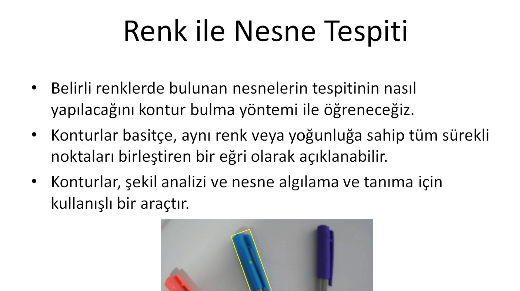

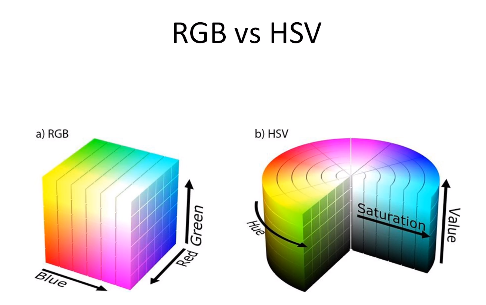

In [1]:

import cv2


C:\Users\APO\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\APO\anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\APO\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
C:\Users\APO\anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:\n%s" %


In [2]:
cv2.ocl.setUseOpenCL(False)

In [3]:
import matplotlib.pyplot as plt


In [4]:
import numpy as np

In [5]:
from collections import deque # tespit ettiğimiz objenin merkezini depolamada kullanacağım

In [6]:
# NESNE MERKEZİNİ DEPOLAYACAK VERİ TİPİ

buffer_size = 16               # deque'nin size'ı
pts = deque(maxlen = buffer_size)                  # nesnenin merkez noktaları 

In [7]:
# nesne tespitinde mavi renkleri kullanacağım bunun için ; 

# mavi renk aralığı vermem gerekiyor (HSV ile (paintte))

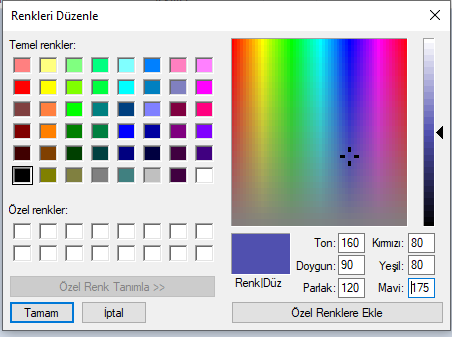

In [8]:
     #       H    S    v 
blueLower = (84,  98 , 0)
blueUpper = (174, 255, 255)

In [9]:
# CAPTURE ( KAMERADAN GÖRÜNTÜ ALMA)

In [10]:
cap = cv2.VideoCapture(0) # 0, ilk kameramı al 
cap.set(3,1260)  # genişlik
cap.set(4,480)  # yükseklik 



True

In [11]:
while True : 
    success, imgOriginal = cap.read()  # yakalama ve okuma işlemni gerçekleştirdım ancak kamerada bir hata olursa opencv hata vermiyor 
                                       # bu yüzden bir koşul yazıyorum 
    
    
    if success : 
        
        # blur
        blurred = cv2.GaussianBlur(imgOriginal,(11,11),0) # imageoriginal boş olursa bunu okuyamaz ve hata alırım
        
        # hsv' ye cevirdim
        hsv = cv2.cvtColor(blurred, cv2.COLOR_BGR2HSV)
        
        # truncu için maske oluştur
        mask = cv2.inRange(hsv,blueLower,blueUpper)
        
        # maskenin etrafında kalan gürültüleri sil
        mask = cv2.erode(mask, None, iterations = 2 )
        
        mask = cv2.dilate(mask, None, iterations = 2 )
        
        # kontur 
        # SADECE EXTERNAL YETERLİ SADECE DIŞINI ARIYORUM CUNKÜ bize içi lazım zaten
        contours,_ = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) 
        
        center = None  # nesnenın merkezı olacak , sonra bunu depolayacağız
        
        # turuncu bir nesne bulabildi isem ;
        
        if len(contours) > 0 :
            # en büyük contürü al
            
            c = max(contours, key = cv2.contourArea) # 
            
            # bu nesnenin etrrafına dikdörtgene çevir
            
            rect = cv2.minAreaRect(c) # bu fonk bana bir rectangle döndürecek ancak , bu çok büyük de olablir
                                      # bu nedenle min. alana sahip bir diktörtgen alıyorum;
                
            ((x,y),(width,height), rotation) = rect   # react. bir tuple. 
            
            s  = "x : {},y : {}, width: {} ,height: {}, rotation: {}".format(np.round(x),
                                                                            np.round(y),
                                                                            np.round(width),
                                                                            np.round(height),
                                                                            np.round(rotation))
            print(s)
            
            
            
            
            # bu rect ile kutucuk elde etmek istiyorum
            
            box = cv2.boxPoints(rect)
            box = np.int64(box)
            
            
            # moment 
            # görüntü pixel ortalamalarının ağırlık ortalamasıdır, yarı çap merkezi vs. bulmammıza yarar
            M = cv2.moments(c)  # en büyük conturu yolladım
            center = (int(M["m10"]/M["m00"]),int(M["m01"]/M["m00"])) # x ve  y leri tuple içinde yazdırdım
            
            
            
            
            # konturu çizdir
            cv2.drawContours(imgOriginal,[box], 0, (0,155,155),2)
            
            # merkeze bir tane nokta çizelim
            cv2.circle(imgOriginal,center,5,(255,0,255),-1)
            
            # bilgileri ekrana yazdır
            cv2.putText(imgOriginal,s,(50,50),cv2.FONT_HERSHEY_COMPLEX_SMALL,1,(0,0,0),2)
            
        # deque
        pts.appendleft(center)   # geçmişteki merkez noktaları takip edebiliyorum
        
        
        for i in range(1,len(pts)):
            if pts[i-1] is None or pts[i] is None : continue
            cv2.line(imgOriginal, pts[i-1],pts[i],(0,233,0),3)    
                                  
       
        cv2.imshow("orijinal tespit",imgOriginal )
     
    # q ya bastıgımda kamerayı kapattı
    
    if cv2.waitKey(1) & 0xFF == ord("q"): 
        break
cv2.destroyAllWindows()

cap.release() 


x : 320.0,y : 240.0, width: 479.0 ,height: 639.0, rotation: 90.0
x : 326.0,y : 279.0, width: 341.0 ,height: 411.0, rotation: 2.0
x : 320.0,y : 226.0, width: 298.0 ,height: 338.0, rotation: 87.0
x : 323.0,y : 277.0, width: 332.0 ,height: 401.0, rotation: 2.0
x : 321.0,y : 219.0, width: 280.0 ,height: 340.0, rotation: 85.0
x : 323.0,y : 280.0, width: 331.0 ,height: 407.0, rotation: 2.0
x : 280.0,y : 226.0, width: 282.0 ,height: 249.0, rotation: 87.0
x : 281.0,y : 272.0, width: 245.0 ,height: 390.0, rotation: 1.0
x : 323.0,y : 279.0, width: 327.0 ,height: 404.0, rotation: 1.0
x : 237.0,y : 227.0, width: 299.0 ,height: 440.0, rotation: 50.0
x : 322.0,y : 277.0, width: 324.0 ,height: 398.0, rotation: 1.0
x : 232.0,y : 230.0, width: 298.0 ,height: 435.0, rotation: 50.0
x : 284.0,y : 185.0, width: 210.0 ,height: 237.0, rotation: 87.0
x : 322.0,y : 274.0, width: 324.0 ,height: 398.0, rotation: 1.0
x : 319.0,y : 157.0, width: 325.0 ,height: 201.0, rotation: 34.0
x : 284.0,y : 189.0, width: 208.